# Decision Tree

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

In [4]:
X.shape, y.shape

((178, 13), (178,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

In [6]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.ndim, X_test.ndim, y_train.ndim, y_test.ndim)

(133, 13) (45, 13) (133,) (45,)
2 2 1 1


In [7]:
clf = DecisionTreeClassifier(random_state = 22) # 셔플은 기본적으로 True
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=22)

In [8]:
y_pred = clf.predict(X_test)
y_pred.shape

(45,)

In [9]:
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.8222222222222222


# Bagging

In [10]:
import matplotlib.pyplot as plt

In [11]:
from sklearn.ensemble import BaggingClassifier

In [12]:
estimator_range = [2,4,6,8,10,12,14,16]

In [13]:
models = []
scores = []

In [14]:
for n_estimators in estimator_range:

    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)
    clf.fit(X_train, y_train)

    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))
    
# n_estimators: The number of base estimators in the ensemble. *base : tree 말고 다른 모델의 파라미터가 될 수도 있으니 base estimator라고 함. tree에 쓰면 tree estimator

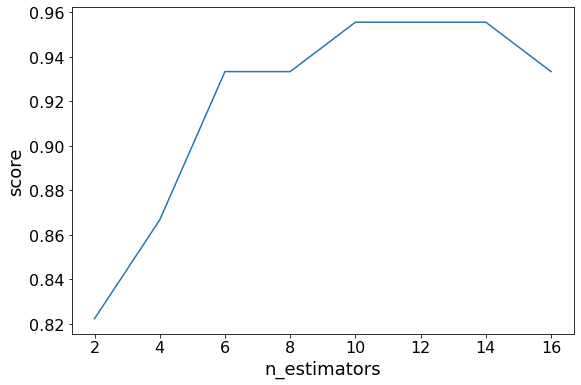

In [15]:
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

plt.show() # 나무를 10개만 쓰면 된다고 해석할 수 있다.

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=22)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=20, random_state=22)

In [18]:
y_pred = clf.predict(X_test)

In [19]:
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred)) # 훨씬 정확도가 높아졌다

Train data accuracy: 1.0
Test data accuracy: 0.9777777777777777
